# Analisis Sentimen Komentar Instagram Cyberbullying Menggunakan Algoritme Machine Learning Tradisional.
---
Fayza Apriliza - Broyden
Uprak NLP

Pada uprak ini saya membuat beberapa perbandingan algoritma, yakni.
1. [Machine Learning Tradisional (MNB, RF, SVM, LR)](https://colab.research.google.com/drive/1UIZqSzWpoN6U2BMWxKxsBUjmpv-U5YTi?usp=sharing)
2. [LSTM dan Bi-LSTM](https://colab.research.google.com/drive/10OFej4duN7LafPh3npGax76bVIYwmz2w?usp=sharing)

Notes: Hyperlink mengarahkan ke colab code program masing-masing.

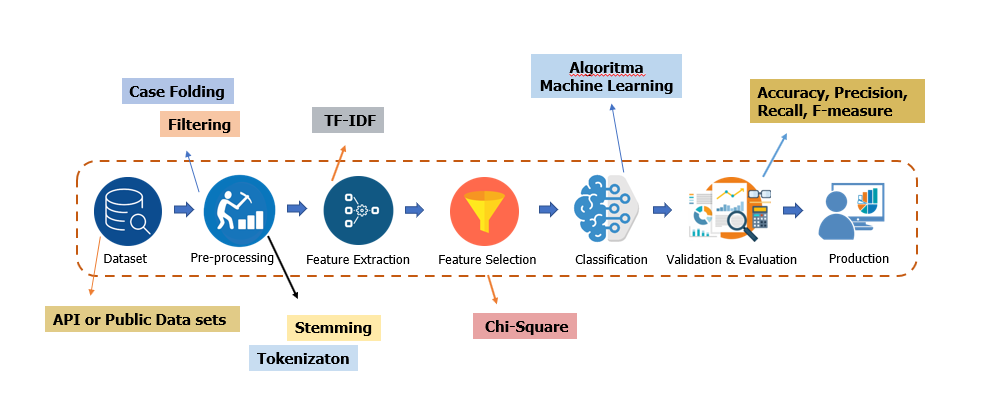

Langkah-langkah penyelesaian meliputi:
1. Data Acquisition
2. Text Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - TF IDF (n_gram = (1,1)
   2. Feature Selection - Chi-Square (n_features = 800)
4. Modelling (Machine Learning)
5. Model Evaluation
6. Deployment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
# Install library Sastrawi
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 01 Data Acquisition

👉 Pada dataset ini memiliki label positive dan negative

In [ ]:
# Download dataset
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv

--2023-04-10 07:19:36--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_komentar_instagram_cyberbullying.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65494 (64K) [text/plain]
Saving to: ‘dataset_komentar_instagram_cyberbullying.csv’

dataset_komentar_in 100%[===================>]  63.96K  --.-KB/s    in 0.01s   

2023-04-10 07:19:36 (5.01 MB/s) - ‘dataset_komentar_instagram_cyberbullying.csv’ saved [65494/65494]



In [ ]:
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [ ]:
data.Sentiment.unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
print('Total Jumlah Tweet:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- Positive\t:', data[data.Sentiment == 'positive'].shape[0], 'tweet')
print('-- Negative\t:', data[data.Sentiment == 'negative'].shape[0], 'tweet')

Total Jumlah Tweet: 400 data

terdiri dari (label):
-- Positive	: 200 tweet
-- Negative	: 200 tweet


👉 Data sudah balance tetapi label masih dalam bentuk kategorik. Jadi, perlu diubah ke dalam numerik.

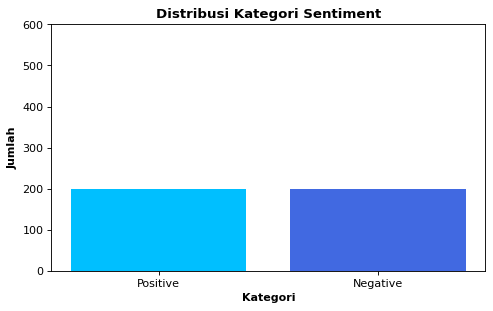

In [ ]:
height = data['Sentiment'].value_counts()
labels = ('Positive', 'Negative')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori Sentiment', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

# 02 Text Preprocessing

## Rename Column

In [ ]:
data.rename(columns = {'Instagram Comment Text':'text'}, inplace = True)

## Drop Column

Dataset terdiri atas 5 kolom. Pada kasus analisis sentimen tayangan televisi hanya membutuhkan atribut sentiment sebagai label/target dan atribut text tweet sebagai X.

In [ ]:
data.drop(['Id'], axis=1, inplace=True)
data.head()

,Sentiment,text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


## Convert Data Label to Numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])
data.head()

,Sentiment,text
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


Penjelasan label

👉 Label 1 : positive

👉 Label 0: negative

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'#[A-Za-z0-9]+','', text)          # Menghapus hastag
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]',' ', text)                # Menghapus karakter tanda baca
  text = re.sub("\s\s+" , " ", text)
  text = text.strip()
  return text

In [ ]:
raw_sample = data['text'].iloc[1]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Geblek lo tata...cowo bgt dibela2in balikan...hadeww...ntar ditinggal lg nyalahin tuh cowo...padahal kitenya yg oon.
Case folding	:  geblek lo tata cowo bgt dibelain balikan hadeww ntar ditinggal lg nyalahin tuh cowo padahal kitenya yg oon


## Word Normalization

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv

--2023-04-08 06:27:24--  https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18911 (18K) [text/plain]
Saving to: ‘kamus_singkatan.csv’

kamus_singkatan.csv 100%[===================>]  18.47K  --.-KB/s    in 0.001s  

2023-04-08 06:27:24 (28.7 MB/s) - ‘kamus_singkatan.csv’ saved [18911/18911]



In [ ]:
key_norm = pd.read_csv('kamus_singkatan.csv', sep=';', names=['singkat', 'hasil'])
print(key_norm.head())

key_norm.shape

   singkat     hasil
0   aamiin     amin 
1     adek     adik 
2     adlh   adalah 
3      aer      air 
4  aiskrim  es krim 


(1309, 2)

In [ ]:
more_key_norm = pd.DataFrame({"singkat":["dgn", "lo", "hadew", "hadeww", "hadewwwww", "duhhh", "kya", "geblek", "ertong", "haters", "kuin", "sorry", "kek", "stju", "msuk", "kitenya", "oon", "sna", "ngrebut", "becus", "kids", "now", "py", "ktakutan", "bp", "apaoun", "tuk", "permpuan", "bangetttt", "akuuu", "yaaa", "yesssssss", "you", "amiiii", "anjirrrr", "anyiennnnggg", "babiii", "bagusss", "bagussss", "beautiful", "cantiik", "cantiikk", "cantikk", "cuantik", "dn", "jijikk", "kaa", "ka", "nyaa", "ogah", "yeee", "yh"],
                    "hasil":["dengan", "kamu", "aduh", "aduh", "aduh", "aduh", "seperti", "goblok", "artis", "pembenci", "ratu", "maaf", "seperti", "setuju", "masuk", "kitanya", "bodoh", "sana", "merebut", "mampu", "anak", "sekarang", "punya", "ketakutan", "bapak", "apapun", "untuk", "perempuan", "sangat", "saya", "ya", "ya", "kamu", "amiin", "anjir", "anjing", "babi", "bagus", "bagus", "cantik", "cantik", "cantik", "cantik", "cantik", "dan", "jijik","kak", "kak", "nya", "tidak", "ya", "ya"]})

In [ ]:
key_norm.tail()

,singkat,hasil
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya
1308,ywdh,ya sudah


In [ ]:
key_norm = key_norm.append(more_key_norm, ignore_index = True)
key_norm.tail()

<ipython-input-184-da70801b27ed>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  key_norm = key_norm.append(more_key_norm, ignore_index = True)


,singkat,hasil
1356,ka,kak
1357,nyaa,nya
1358,ogah,tidak
1359,yeee,ya
1360,yh,ya


In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [ ]:
# Hapus stopword
stopwords_ind.remove('tidak')
len(stopwords_ind)

757

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['buk', 'alah', 'ih', "hehe", "wkwkwk", "wkwkwkwk", "hahaha", 
                 "cuy", "hoy", "yah", "wah", "sis", "sist", "y", "lho", 
                 "Helooow", "woy", "oi", "woi", "si", "sih", "nya", "sih", "ya",
                 "tuh", "ato", "eh", "ny", "la", "ko", "mb", "mh",
                 "ya", "wkwk", "wkwkwkwkw", "zzzzz", "brrrrr", "apa"]     
         
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['text'].iloc[149]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:   <USERNAME> gw tanya. Emang kador artis beneran? Komen lo tolol sumpah. Masa harus kenal dia buat nilai dia artis atau bukan. Hahaha semua org indo jg pasti setuju kalo kador bukan artis tp cuma celebgram dr kampung. Lo tau kan bedanya artis dg selebgra
Case folding		:  username gw tanya emang kador artis beneran komen lo tolol sumpah masa harus kenal dia buat nilai dia artis atau bukan hahaha semua org indo jg pasti setuju kalo kador bukan artis tp cuma celebgram dr kampung lo tau kan bedanya artis dg selebgra
Stopword removal	:  username gw emang kador artis beneran komen lo tolol sumpah kenal nilai artis org indo jg setuju kalo kador artis tp celebgram dr kampung lo tau bedanya artis dg selebgra


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['text'].iloc[148]
case_folding = casefolding(raw_sample)
textnormalize = text_normalize(case_folding)
stopword_removal = remove_stop_words(textnormalize)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Text normalize\t: ', textnormalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Si wanita jahiliyah.. Lesbi , skrg udh py pacar lg. Kasian anaknya. Kmrn di ksh bencana slnya dia tega misahin anak dr bapak nya, dia ktakutan anak nya masuk islam pdhl bp nya g prnh nuntut anaknya memeluk islam. Udh di ksh nikmat anak 3 org, msh aja begajulan.
Case folding		:  si wanita jahiliyah lesbi skrg udh py pacar lg kasian anaknya kmrn di ksh bencana slnya dia tega misahin anak dr bapak nya dia ktakutan anak nya masuk islam pdhl bp nya g prnh nuntut anaknya memeluk islam udh di ksh nikmat anak org msh aja begajulan
Text normalize	:  si wanita jahiliyah lesbi sekarang  sudah  punya pacar lagi  kasihan  anaknya kemarin  di kasih  bencana slnya dia tega misahin anak dari  bapak nya dia ketakutan anak nya masuk islam padahal  bapak nya tidak pernah  nuntut anaknya memeluk islam sudah  di kasih  nikmat anak orang  masih  saja  begajulan
Stopword removal	:  wanita jahiliyah lesbi pacar kasihan anaknya kemarin kasih bencana slnya tega misahin anak ketakutan anak masuk isl

## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['text'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 2min 47s, sys: 546 ms, total: 2min 47s
Wall time: 3min 12s


In [ ]:
data

,Sentiment,text,clean_teks
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol tidak hubung gugur pakai hijab ...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......,goblok tata cowok bain balik aduh tinggal nyal...
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kemarin mewek lengket aduh labil mbak abege ke...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kesal att tidak anak kasihan kembang psik...
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",aduh perempuan sakit jiwa peran utama film han...
...,...,...,...
395,1,Bangga sama suami yg selalu ingat istri disela...,bangga suami istri sela apa profesi kau juara ...
396,1,Apaoun pekerjaannya yg penting halal u tuk men...,apa kerja halal nafkah keluarga semangat
397,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran tidak kerja putus ...
398,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik ayu loh mbak temu langsun...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# 03 Feature Engineering

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['Sentiment']

In [ ]:
X

0      username tolol tidak hubung gugur pakai hijab ...
1      goblok tata cowok bain balik aduh tinggal nyal...
2      kemarin mewek lengket aduh labil mbak abege ke...
3      inti kesal att tidak anak kasihan kembang psik...
4      aduh perempuan sakit jiwa peran utama film han...
                             ...                        
395    bangga suami istri sela apa profesi kau juara ...
396             apa kerja halal nafkah keluarga semangat
397    gojek mayoritas pegangguran tidak kerja putus ...
398    username asli cantik ayu loh mbak temu langsun...
399    username suami umur mba tua alhamdulillah suam...
Name: clean_teks, Length: 400, dtype: object

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sentiment, Length: 400, dtype: int64

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

Menggunakan unigram untuk memperingankan komputasi karena jumlah fitur yang dihasilkan tidak terlalu banyak.

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

2122


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aammiinnn' 'abal' 'abang' ... 'zaman' 'zholimi' 'zina']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aammiinnn,abal,abang,abbey,abege,abiiis,abis,abiss,abu,ac,...,ygblain,yo,yoo,youtube,yra,yuk,yutub,zaman,zholimi,zina
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.266071,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection (Chi Square)

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=800) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2122
Reduced feature number: 800


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.275846
1,0.909921
2,0.239173
3,0.511244
4,0.000772
...,...
2117,0.173139
2118,0.224563
2119,0.173819
2120,0.263851


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.275846,aammiinnn
1,0.909921,abal
2,0.239173,abang
3,0.511244,abbey
4,0.000772,abege
...,...,...
2117,0.173139,yuk
2118,0.224563,yutub
2119,0.173819,zaman
2120,0.263851,zholimi


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
376,8.237631e+00,cantik
1251,6.134507e+00,moga
317,5.080072e+00,bodoh
903,4.812446e+00,kampung
1456,4.715091e+00,orang
...,...,...
620,3.308278e-04,gaya
157,2.281483e-04,baek
2102,1.851154e-05,yaelah
1395,3.774053e-06,nimbrung


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False,  True, False, ..., False, False,  True])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abal',
 'abbey',
 'acha',
 'adat',
 'admin',
 'aduh',
 'after',
 'agnes',
 'agus',
 'ah',
 'ahahahhaha',
 'ajaaa',
 'akhlak',
 'akun',
 'alam',
 'alami',
 'alay',
 'alesha',
 'alhamdulillah',
 'allah',
 'am',
 'amazing',
 'amel',
 'amiin',
 'amin',
 'amit',
 'amora',
 'ampe',
 'ampuuun',
 'anang',
 'anda',
 'angguunn',
 'ani',
 'anjing',
 'anjir',
 'anti',
 'apa',
 'apain',
 'apik',
 'ariel',
 'artis',
 'asa',
 'ashanti',
 'asik',
 'att',
 'audisi',
 'aurel',
 'aw',
 'awat',
 'awet',
 'ayah',
 'ayu',
 'ayuu',
 'azriel',
 'babi',
 'bacot',
 'badaaiik',
 'baguass',
 'bagus',
 'bahagia',
 'baik',
 'bak',
 'bakat',
 'bala',
 'balajaer',
 'balas',
 'banci',
 'banding',
 'bang',
 'bangeeet',
 'bangeg',
 'banget',
 'bangetttttttt',
 'bangga',
 'bangsa',
 'bangsat',
 'bangt',
 'bantet',
 'banyak',
 'barakallah',
 'batman',
 'bawa',
 'bayar',
 'bedak',
 'before',
 'begitu',
 'bego',
 'begoh',
 'begok',
 'belagu',
 'belajaer',
 'belakang',
 'belepotan',
 'beliau',
 'bella',
 'benci',
 'bencong

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'username': 2043,
 'tolol': 1985,
 'tidak': 1968,
 'pakai': 1472,
 'hijab': 744,
 'panas': 1479,
 'otak': 1462,
 'komentar': 1009,
 'goblok': 661,
 'cowok': 428,
 'aduh': 20,
 'bodoh': 317,
 'mbak': 1186,
 'sensasi': 1770,
 'biar': 282,
 'artis': 113,
 'att': 129,
 'kasihan': 913,
 'orang': 1456,
 'anda': 80,
 'benci': 258,
 'asa': 115,
 'nama': 1309,
 'manusia': 1157,
 'perempuan': 1526,
 'jiwa': 866,
 'tinggalin': 1976,
 'laki': 1047,
 'mikir': 1220,
 'urus': 2038,
 'mending': 1200,
 'biasa': 285,
 'balajaer': 176,
 'ig': 770,
 'asik': 121,
 'tar': 1926,
 'lagu': 1043,
 'laknat': 1050,
 'ngamuk': 1342,
 'goda': 663,
 'laku': 1051,
 'mati': 1173,
 'indonesia': 785,
 'buruk': 363,
 'sopan': 1850,
 'pilih': 1556,
 'kelas': 939,
 'ayu': 144,
 'janda': 838,
 'anjing': 91,
 'suara': 1872,
 'hancur': 709,
 'goreng': 668,
 'syarat': 1902,
 'sah': 1688,
 'islam': 806,
 'kawin': 918,
 'penuh': 1519,
 'emak': 557,
 'ngerebut': 1370,
 'ngedukung': 1354,
 'sifat': 1810,
 'jelek': 851,
 'ckck': 4

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal,abbey,acha,adat,admin,aduh,after,agnes,agus,ah,...,weding,weewww,wow,yaa,yaampun,yatuhan,yes,youtube,yra,zina
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.274340,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.234787,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.235051,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 04 Modelling (Machine Learning)

In [ ]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=21)

In [ ]:
# Training the model
mnb = MultinomialNB()               # Load algoritma pembelajaran
rf = RandomForestClassifier()
lr = LogisticRegression()
svm = svm.SVC()
model_mnb = mnb.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 
model_rf = rf.fit(X_train, y_train)
model_lr = lr.fit(X_train, y_train)
model_svm = lr.fit(X_train, y_train)

# Simpan model hasil traning
dump(model_mnb, filename='model_mnb.joblib')
dump(model_rf, filename='model_rf.joblib')
dump(model_lr, filename='model_lr.joblib')
dump(model_svm, filename='model_svm.joblib')

['model_svm.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred_mnb = model_mnb.predict(X_test)
model_pred_rf = model_rf.predict(X_test)
model_pred_lr = model_lr.predict(X_test)
model_pred_svm = model_svm.predict(X_test)

In [ ]:
# Tampilkan hasil prediksi label dari model
model_pred_mnb

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
# Tampilkan hasil prediksi label dari model
model_pred_rf

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
# Tampilkan hasil prediksi label dari model
model_pred_lr

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
model_pred_svm

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

# 05 Model Evaluation

**MultinomialNB**

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_mnb = (model_pred_mnb == y_test).sum()
prediksi_salah_mnb = (model_pred_mnb != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_mnb)
print('Jumlah prediksi salah\t:', prediksi_salah_mnb)

accuracy_mnb = prediksi_benar_mnb / (prediksi_benar_mnb + prediksi_salah_mnb)*100
print('Akurasi pengujian\t:', accuracy_mnb, '%')

Jumlah prediksi benar	: 77
Jumlah prediksi salah	: 3
Akurasi pengujian	: 96.25 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm_mnb = confusion_matrix(y_test, model_pred_mnb)
print('Confusion matrix:\n', cm_mnb)

Confusion matrix:
 [[43  0]
 [ 3 34]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred_mnb))

Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.92      0.96        37

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_mnb = (cross_val_score(model_mnb, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy_mnb = np.mean(cv_accuracy_mnb)

print('Akurasi setiap split:', cv_accuracy_mnb, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_mnb)

Akurasi setiap split: [0.9125 0.975  0.975  0.975  0.9375 0.95   0.9375 0.925  0.9625 0.975 ] 

Rata-rata akurasi pada cross validation: 0.9525


**Random Forest**

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_rf = (model_pred_rf == y_test).sum()
prediksi_salah_rf = (model_pred_rf != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_rf)
print('Jumlah prediksi salah\t:', prediksi_salah_rf)

accuracy_rf = prediksi_benar_rf / (prediksi_benar_rf + prediksi_salah_rf)*100
print('Akurasi pengujian\t:', accuracy_rf, '%')

Jumlah prediksi benar	: 67
Jumlah prediksi salah	: 13
Akurasi pengujian	: 83.75 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, model_pred_rf)
print('Confusion matrix:\n', cm_rf)

Confusion matrix:
 [[35  8]
 [ 5 32]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred_rf))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.80      0.86      0.83        37

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_rf = (cross_val_score(model_rf, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy_rf = np.mean(cv_accuracy_rf)

print('Akurasi setiap split:', cv_accuracy_rf, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_rf)

Akurasi setiap split: [0.825  0.9    0.825  0.9    0.8125 0.85   0.8625 0.8    0.775  0.9375] 

Rata-rata akurasi pada cross validation: 0.8487500000000001


**Logistic Regression**

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_lr = (model_pred_lr == y_test).sum()
prediksi_salah_lr = (model_pred_lr != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_lr)
print('Jumlah prediksi salah\t:', prediksi_salah_lr)

accuracy_lr = prediksi_benar_lr / (prediksi_benar_lr + prediksi_salah_lr)*100
print('Akurasi pengujian\t:', accuracy_lr, '%')

Jumlah prediksi benar	: 75
Jumlah prediksi salah	: 5
Akurasi pengujian	: 93.75 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, model_pred_lr)
print('Confusion matrix:\n', cm_lr)

Confusion matrix:
 [[41  2]
 [ 3 34]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred_lr))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.94      0.92      0.93        37

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_lr = (cross_val_score(model_lr, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy_lr = np.mean(cv_accuracy_lr)

print('Akurasi setiap split:', cv_accuracy_lr, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_lr)

Akurasi setiap split: [0.875  0.95   0.925  0.9625 0.9    0.9375 0.925  0.8875 0.925  0.9625] 

Rata-rata akurasi pada cross validation: 0.9250000000000002


**SVM**

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test).sum()
prediksi_salah_svm = (model_pred_svm != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')

Jumlah prediksi benar	: 75
Jumlah prediksi salah	: 5
Akurasi pengujian	: 93.75 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, model_pred_svm)
print('Confusion matrix:\n', cm_svm)

Confusion matrix:
 [[41  2]
 [ 3 34]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred_svm))

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.94      0.92      0.93        37

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_svm = (cross_val_score(model_svm, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy_svm = np.mean(cv_accuracy_svm)

print('Akurasi setiap split:', cv_accuracy_svm, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_svm)

Akurasi setiap split: [0.875  0.95   0.925  0.9625 0.9    0.9375 0.925  0.8875 0.925  0.9625] 

Rata-rata akurasi pada cross validation: 0.9250000000000002


# 06 Simple Deployment


In [ ]:
from joblib import load

# load model
model = load('model_mnb.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
#@title Masukkan Teks Anda:
input_text = "si att sayang banget sm anaknya cuma perhatiin deh anakny kek kurang gizi decccc" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sentiment = 'Negative'
else:
  sentiment = 'Positive'

print('Hasil prediksi', input_text, ' adalah\n', sentiment)

Hasil Text Preprocessing : att sayang anak perhatiin deh anakny gizi decccc
Hasil prediksi si att sayang banget sm anaknya cuma perhatiin deh anakny kek kurang gizi decccc  adalah
 Negative


# 07 WordCloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-04-08 08:01:33--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.003s  

2023-04-08 08:01:34 (10.4 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

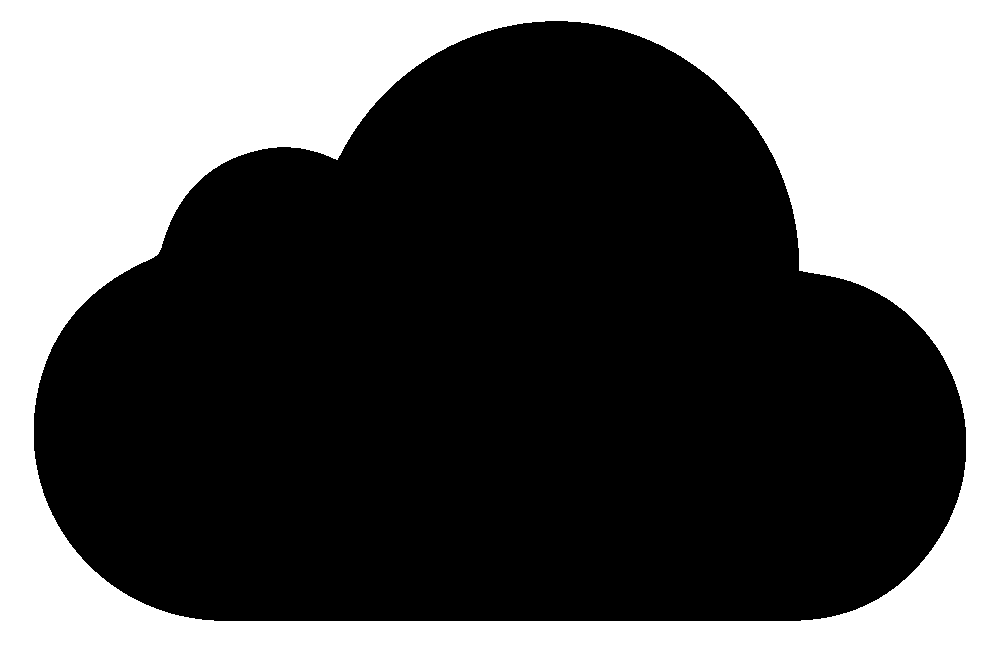

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

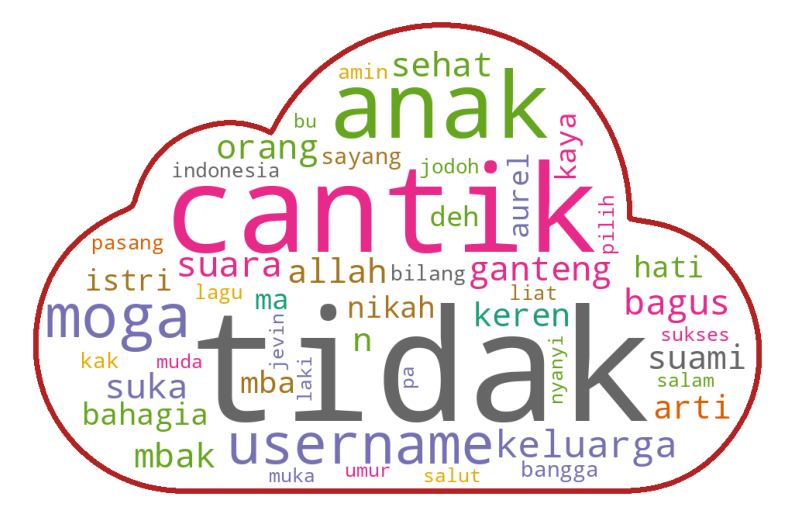

In [ ]:
# WordCloud Label SMS positive
positive = data[data.Sentiment == 1]
normal_string = []

for t in positive.clean_teks:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

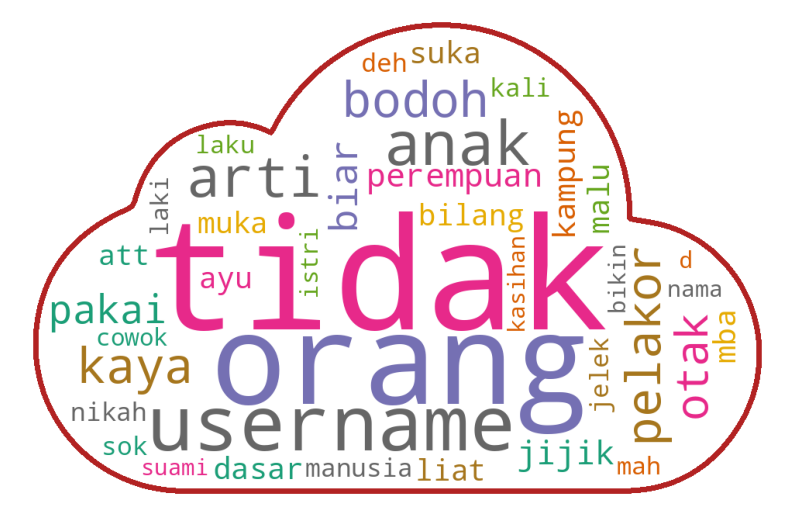

In [ ]:
# WordCloud Label negative

negative = data[data.Sentiment == 0]
fraud_string = []

for t in negative.clean_teks:
  fraud_string.append(t)

fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()